In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
df = pd.read_csv('new_train2.csv')

In [5]:
# Preprocess
df['label'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
del df['y']

X = df.drop('label', axis=1)
y = df['label']

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_features = ['age', 'duration', 'campaign']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)  # Set sparse_output=False
    ])

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
def train_and_plot(model, name):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Training 
    pipeline.fit(X_train, y_train)
    
    # Validate: cross-validation
    cv_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy for {name}: {np.mean(cv_score):.4f} ± {np.std(cv_score):.4f}")
    
    # Testing
    y_pred = pipeline.predict(X_test)
    print(f"Test Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}")
    
    # Classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix: {name}')
    plt.show()
    
    # ROC curve
    probas_ = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{name} ROC (AUC = {roc_auc:.2f})', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Precision Recall curve
    precision, recall, _ = precision_recall_curve(y_test, probas_)
    
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, marker='.', label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {name}')
    plt.legend()
    plt.show()

## Logistic Regression

Cross-Validation Accuracy for Logistic Regression: 0.9018 ± 0.0015
Test Accuracy for Logistic Regression: 0.9013
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8768
           1       0.61      0.34      0.44      1119

    accuracy                           0.90      9887
   macro avg       0.77      0.66      0.69      9887
weighted avg       0.89      0.90      0.89      9887



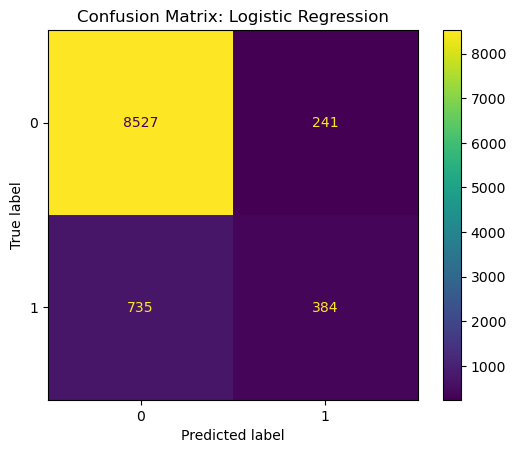

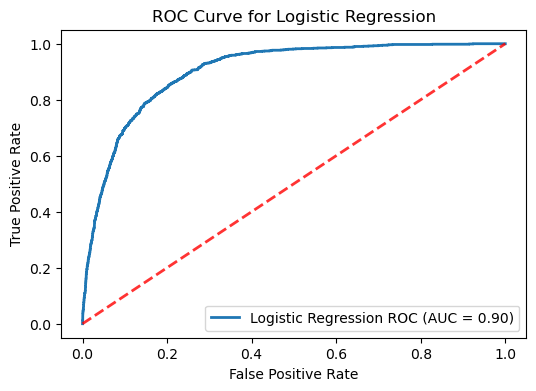

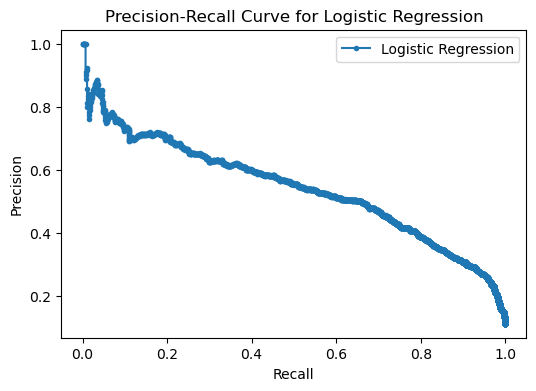

In [6]:
model = LogisticRegression(solver='liblinear', max_iter=1000)
name = "Logistic Regression"

train_and_plot(model, name)

## KNN

Cross-Validation Accuracy for KNN: 0.8885 ± 0.0020
Test Accuracy for KNN: 0.8918
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8768
           1       0.55      0.26      0.35      1119

    accuracy                           0.89      9887
   macro avg       0.73      0.62      0.65      9887
weighted avg       0.87      0.89      0.87      9887



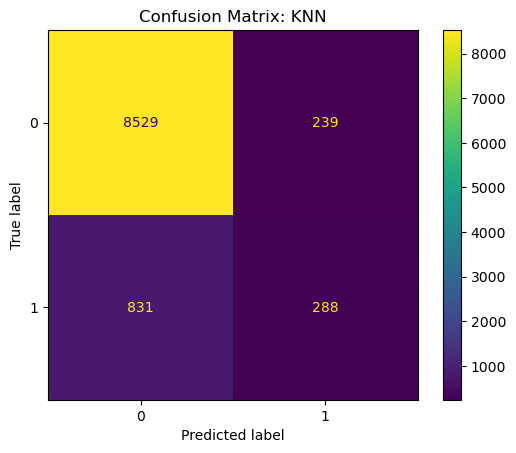

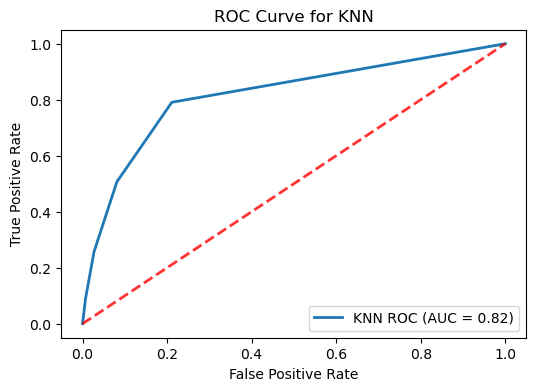

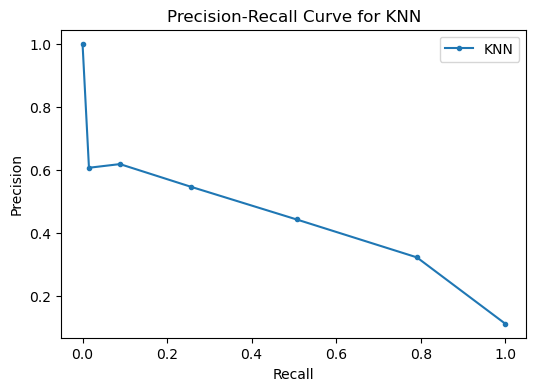

In [7]:
model = KNeighborsClassifier()
name = "KNN"

train_and_plot(model, name)

## Naive Bayes

Cross-Validation Accuracy for Naive Bayes: 0.7991 ± 0.0068
Test Accuracy for Naive Bayes: 0.8035
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      8768
           1       0.32      0.66      0.43      1119

    accuracy                           0.80      9887
   macro avg       0.64      0.74      0.66      9887
weighted avg       0.88      0.80      0.83      9887



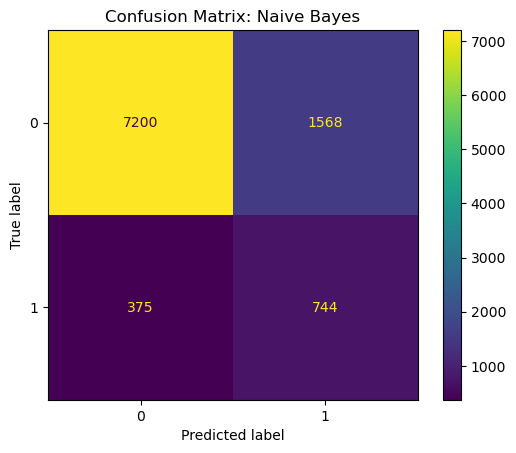

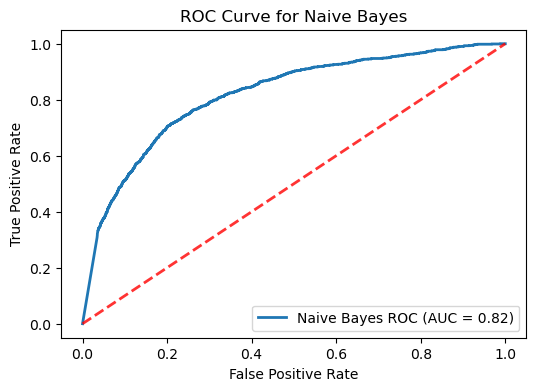

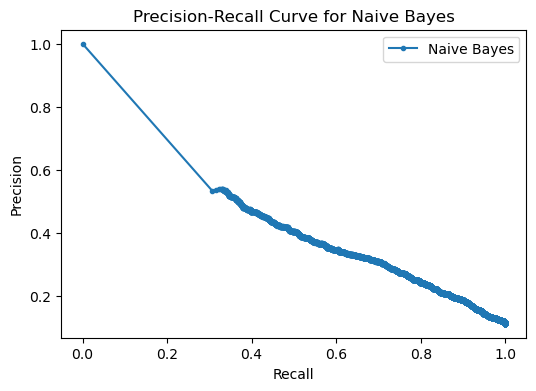

In [8]:
model = GaussianNB()
name = "Naive Bayes"

train_and_plot(model, name)

## Decision Tree

Cross-Validation Accuracy for Decision Tree: 0.8719 ± 0.0054
Test Accuracy for Decision Tree: 0.8721
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      8768
           1       0.44      0.48      0.46      1119

    accuracy                           0.87      9887
   macro avg       0.69      0.70      0.69      9887
weighted avg       0.88      0.87      0.87      9887



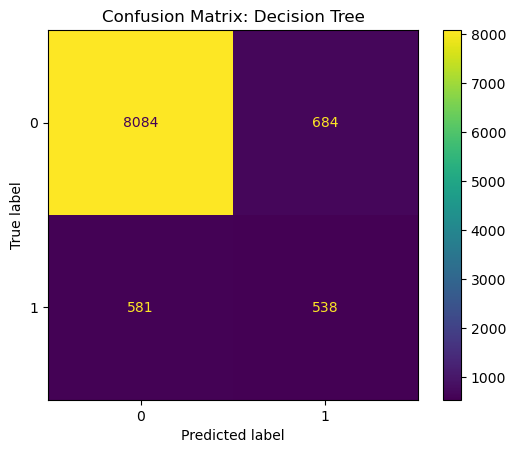

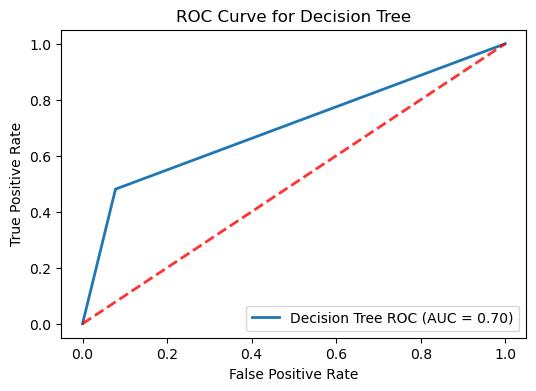

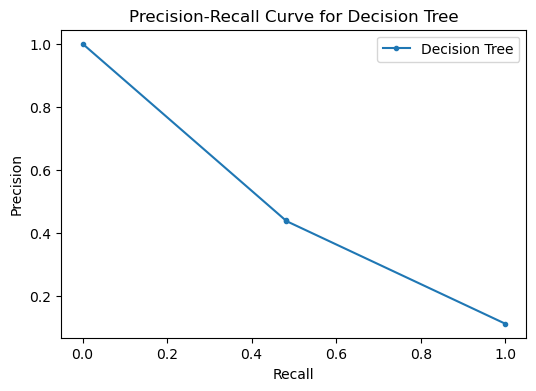

In [9]:
model = DecisionTreeClassifier()
name = "Decision Tree"

train_and_plot(model, name)

## Random Forest

Cross-Validation Accuracy for Random Forest: 0.9009 ± 0.0051
Test Accuracy for Random Forest: 0.9019
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8768
           1       0.61      0.38      0.47      1119

    accuracy                           0.90      9887
   macro avg       0.77      0.67      0.71      9887
weighted avg       0.89      0.90      0.89      9887



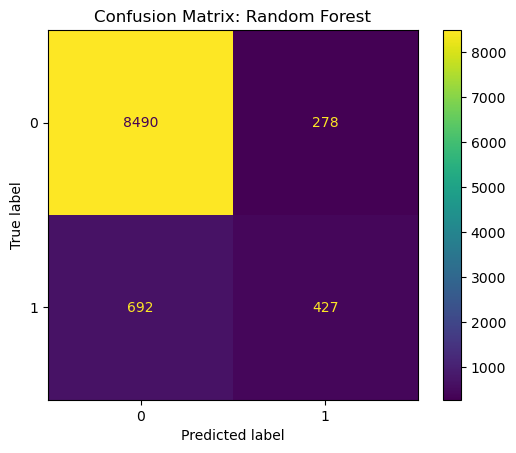

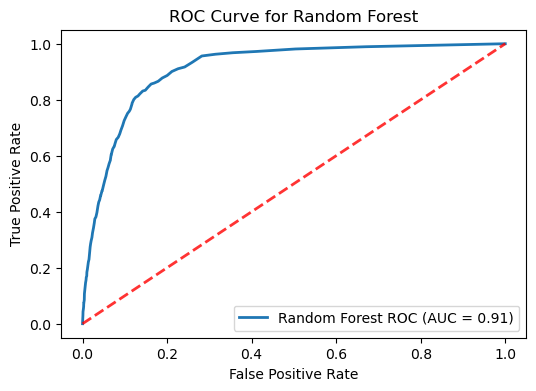

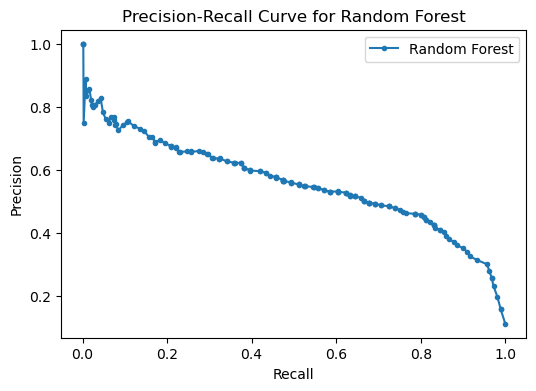

In [10]:
model = RandomForestClassifier()
name = "Random Forest"

train_and_plot(model, name)

## SVM

Cross-Validation Accuracy for SVM: 0.9018 ± 0.0016
Test Accuracy for SVM: 0.9032
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8768
           1       0.70      0.25      0.37      1119

    accuracy                           0.90      9887
   macro avg       0.81      0.62      0.66      9887
weighted avg       0.89      0.90      0.88      9887



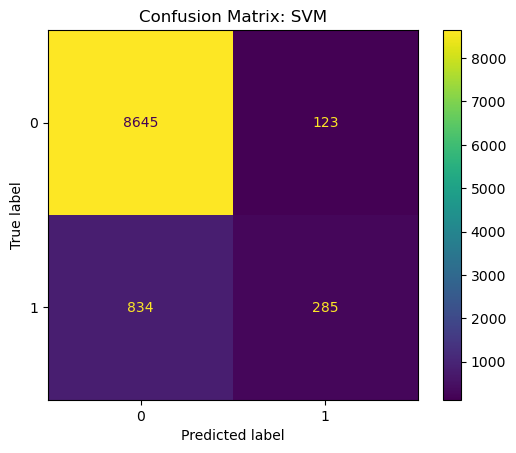

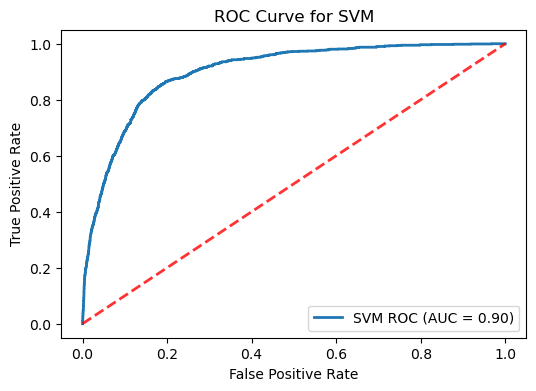

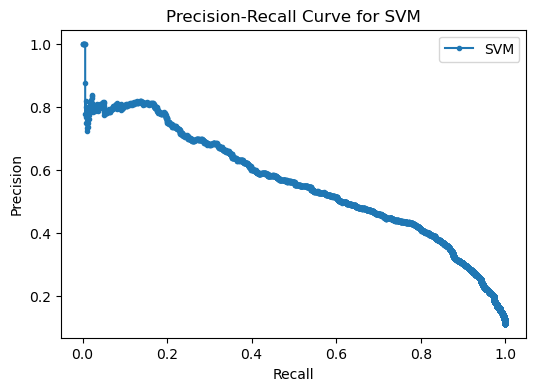

In [8]:
model = SVC(probability=True)
name = "SVM"

train_and_plot(model, name)

## Linear Discriminant Analysis

Cross-Validation Accuracy for Linear Discriminant Analysis: 0.8993 ± 0.0031
Test Accuracy for Linear Discriminant Analysis: 0.9019
Classification Report for Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8768
           1       0.61      0.38      0.46      1119

    accuracy                           0.90      9887
   macro avg       0.77      0.67      0.71      9887
weighted avg       0.89      0.90      0.89      9887



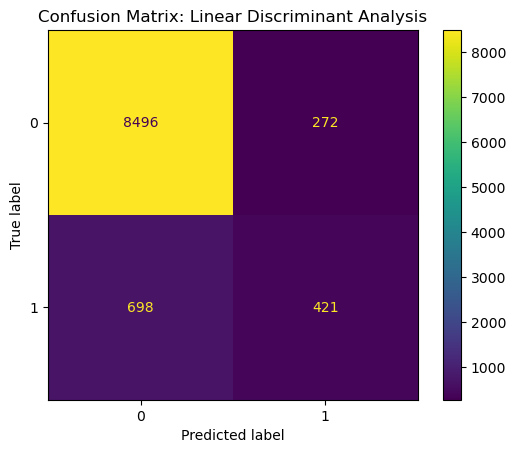

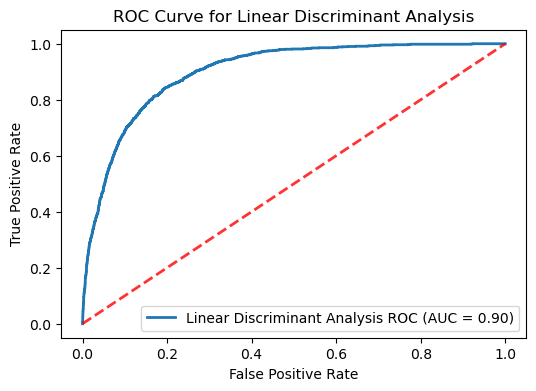

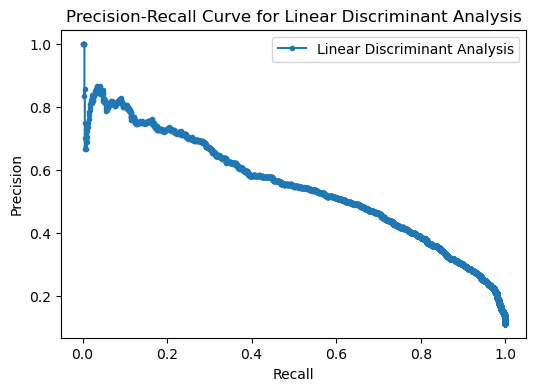

In [9]:
model = LinearDiscriminantAnalysis()
name = "Linear Discriminant Analysis"

train_and_plot(model, name)

In [ ]:
print(df.columns)